<a href="https://colab.research.google.com/github/sktkddn777/Covid-19/blob/master/2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다중회귀

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv') #농어의 데이터 여러가지가 주소에 csv형태로 있음 
perch_full = df.to_numpy()
print(perch_full)
#length, height, width

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런 변환기
PolynomialFeatures Class

변환기는 입력데이터를 변환하는데 타겟데이터가 필요하지 않는다.
fit()에 입력데이터만 전달
2개의 특성을 가진 샘플이 6개의 특성을 가진 샘플로 바뀜

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures -> 각 특성 제곱한 항을 추가(4, 9) 
2와 3을 곱한 6이 추가
선형방정식의 절편 항상 1이다.

사이킷런 선형 모델은 자동으로 절편을 추가함 -> 1을 지운다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


위의 방식을 이용할것

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names() #값이 어떤식으로 얻어졌는지 확인할 수 있음

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


특성을 더 많이 추가

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) #과대적합이 됌.

0.9999999999991096
-144.40579242335605


훈련세트를 과도하게 학습하지 못하도록 하기 위해
<규제>를 한다.
#선형회귀 -> 계수의 크기를 작게 만든다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지, 라쏘 : 선형회귀모델에 규제를 추가한 모델
(계수에 제곱), (계수의 절댓값)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


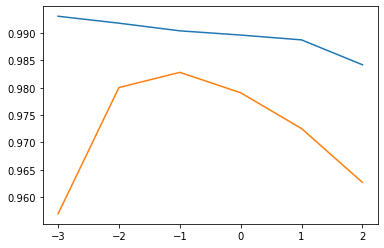

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #alpha: 사람이 임의로 지정한 매개변수(R^2그래프를 그려본후 훈련세트와 테스트 세트의 점수가 가장 가까운 지점 확인)
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score) # log10으로 값을 지수로 표현
plt.show() #-1임을 확인

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


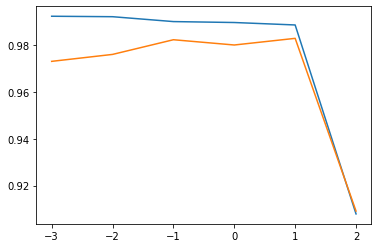

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #alpha: 사람이 임의로 지정한 매개변수(R^2그래프를 그려본후 훈련세트와 테스트 세트의 점수가 가장 가까운 지점 확인)
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score) # log10으로 값을 지수로 표현
plt.show() #-1임을 확인

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print(np.sum(lasso.coef_ == 0)) #-------------------왜 0으로 만들지?

0.9888067471131867
0.9824470598706695
40


로지스틱 회귀

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv')
print(fish.head())
print(pd.unique(fish['Species']))

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기를 통해 (이웃의 클래스 비융)확률 계산

어떤 데이터가 주어졌을 떄 그 데이터를 가지고 어떤 Species가 있을지 확률 계산

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexs = kn.kneighbors(test_scaled[3:4]) #--------[3]으로 하면 안댐.?
print(train_target[indexs])

[['Roach' 'Perch' 'Perch']]


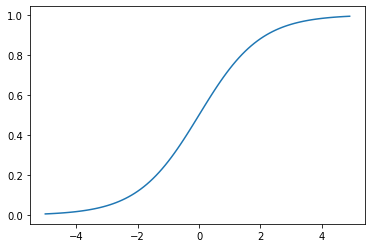

In [ ]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수
plt.plot(z, phi)
plt.show()

In [ ]:
#Bream과 Smelt 종류만 골라내기
bream_smelt_indexs = (train_target == 'Bream') | (train_target == 'Smelt') #Bream | Smelt -> True
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


Logistic Regression : 출력이 0, 1사이

coefficients, intercept = 0

log-odds 계산 = P(A) / 1-P(A)

Sigmoid Function (phi)


In [ ]:
print(lr.coef_, lr.intercept_) #Logistig Regression -> trained coefficient and intercept
#---------------------어떻게 학습을 한거지

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


-0.404 x Weight -0.576 x Length -0.663 x Diagonal -1.013 x Height - 0.732 x width - 2.161

In [ ]:
#Logistic Regression -> decision_funnction으로 위의 식 결과값 확인 가능
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions)) #Sigmoid함수에 대입해주는 함수

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
lr = LogisticRegression(C = 20, max_iter=1000) #C :(기본값:1 , 클 수록 규제 완화 ) max_iter : 반복횟수
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


클래스마다 z값을 하나씩 계산(다중 분류)

가장 높은 z값을 출력하는 클래스가 예측클래스

소프트맥스 함수를 사용 ->ㅣ 7개의 z값을 확률로 변환

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3)) #------------------위의 predict_proba랑 비교해보면 결과값이 일치하는데 그럼 이 softmax함수를 쓰는 이유가 뭐지ㅏㅇㄴㅁ?

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
